In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('D:/11 semester/ML/FINAL/Auto Sales data.csv')

In [6]:
label_encoder = LabelEncoder()
df['DEALSIZE'] = label_encoder.fit_transform(df['DEALSIZE'])
df['PRODUCTLINE'] = label_encoder.fit_transform(df['PRODUCTLINE'])
df['COUNTRY'] = label_encoder.fit_transform(df['COUNTRY'])

In [8]:
X = df.drop(['SALES', 'ORDERDATE', 'STATUS', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'], axis=1)
y = df['SALES']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [14]:
rfe = RFE(model, n_features_to_select=5) 

In [16]:
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

In [18]:
model.fit(X_train_rfe, y_train)

GradientBoostingRegressor(random_state=42)

In [20]:
y_pred = model.predict(X_test_rfe)

In [23]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 23458.25039776859
Root Mean Squared Error (RMSE): 153.16086444574734
Mean Absolute Error (MAE): 113.52044249336186
R-squared (R2) Score: 0.9923045841558112


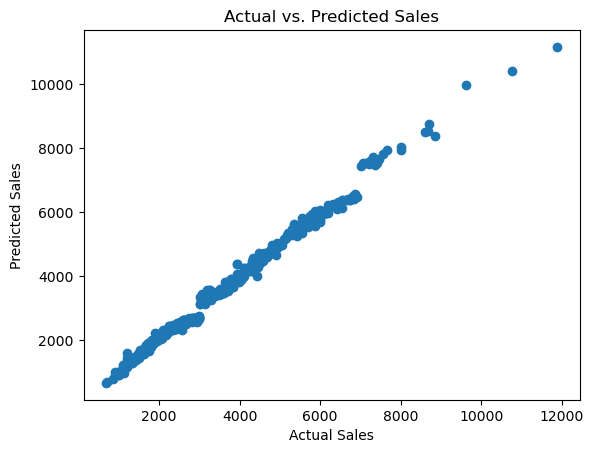

In [24]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()